In [9]:
import matplotlib.pyplot as plt
import numpy as np

class RamanSpectrum:
    def __init__(self, filepath):
        # Read in the data from the file
        with open(filepath, 'r', encoding='iso-8859-1') as f:
            lines = f.readlines()
        
        # Extract the metadata from the file
        metadata = {}
        for line in lines:
            if line.startswith("#"):
                key, value = line.strip().split("=")
                metadata[key[1:]] = value
        
        # Extract the x and y data from the file
        data = np.loadtxt(lines[len(metadata):])
        self.x = data[:,0]
        self.y = data[:,1]
        
        # Store the metadata as object attributes
        self.metadata = metadata
    
    def plot(self):
        plt.plot(self.x, self.y)
        plt.xlabel("Wavenumber (cm$^{-1}$)")
        plt.ylabel("Intensity (counts)")
        plt.show()
    
    def denoise(self, window_size=5, threshold=0.1):
        # Apply a rolling mean filter to the data
        rolling_mean = np.convolve(self.y, np.ones(window_size)/window_size, mode='valid')
        
        # Find the indices where the difference between the original data and the filtered data exceeds the threshold
        diff = np.abs(self.y[window_size//2:-window_size//2] - rolling_mean)
        noise_indices = np.where(diff > threshold)[0] + window_size//2
        
        # Remove the noisy points from the data
        new_x = np.delete(self.x, noise_indices)
        new_y = np.delete(self.y, noise_indices)
        
        return new_x, new_y

In [10]:
import os

path = "raman_2/"
files = []

for r, d, f in os.walk(path):
    for file in f:
        files.append(file)

print(files)

['Si_nano_muestra 3_25.txt', 'Si_nano_muestra 3_16.txt', 'Si_nano_muestra 3_63.txt', 'Si_nano_muestra 3_01.txt', 'Si_nano_muestra 3_64.txt', 'Si_nano_muestra 3_31.txt', 'Si_nano_muestra 3_46.txt', 'Si_nano_muestra 3_59.txt', 'Si_nano_muestra 3_57.txt', 'Si_nano_muestra 3_38.txt', 'Si_nano_muestra 3_62.txt', 'Si_nano_muestra 3_48.txt', 'Si_nano_muestra 3_37.txt', 'Si_nano_muestra 3_34.txt', 'Si_nano_muestra 3_33.txt', 'Si_nano_muestra 3_17.txt', 'Si_nano_muestra 3_65.txt', 'Si_nano_muestra 3_52.txt', 'Si_nano_muestra 3_32.txt', 'Si_nano_muestra 3_60.txt']


In [11]:
spec = RamanSpectrum("raman_2/"+files[1])

/home/codespace/.local/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/home/codespace/.local/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


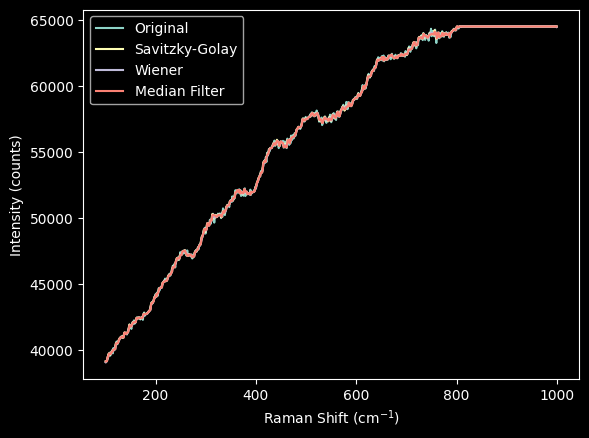

In [12]:
x = spec.x
y = spec.y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, wiener, medfilt

# Denoise the signal using three different methods
y_savgol = savgol_filter(y, window_length=8, polyorder=4)
y_wiener = wiener(y)
y_medfilt = medfilt(y)

# Plot the original and denoised signals
plt.plot(x, y, label='Original')
plt.plot(x, y_savgol, label='Savitzky-Golay')
plt.plot(x, y_wiener, label='Wiener')
plt.plot(x, y_medfilt, label='Median Filter')
plt.legend()
plt.xlabel('Raman Shift (cm$^{-1}$)')
plt.ylabel('Intensity (counts)')
plt.show()

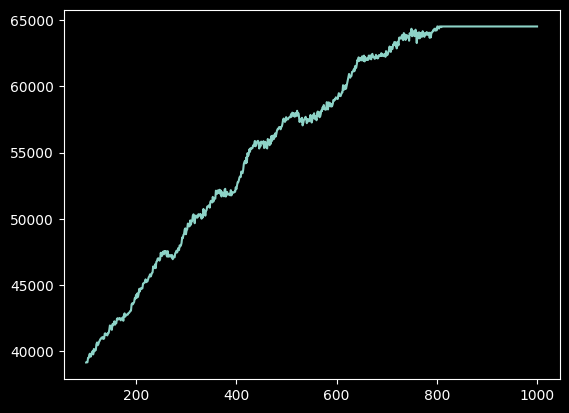

In [13]:
plt.plot(x, y, label='Original')

In [14]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

x1, x2 = x.min(), x.max()
y1, y2 = y.min(), y.max()


def plot_functions(x_range, y_range):
    plt.plot(x, y_savgol, color='red', label='Savitzky-Golay')
    plt.plot(x, y_medfilt, color='green', label='Median Filter')
    plt.plot(x, y_wiener, color='blue', label='Wiener')
    plt.ylim(y_range)
    plt.xlim(x_range)
    plt.legend()
    plt.show()

x_slider = widgets.FloatRangeSlider(
    value=[x1, x2],
    min=x1,
    max=x2,
    step=40,
    description='X range:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

y_slider = widgets.FloatRangeSlider(
    value=[y1, y2],
    min=y1,
    max=y2,
    step=100,
    description='Y range:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,

)

def update_plot(x_range, y_range):
    plot_functions(x_range, y_range)

interactive_plot = widgets.interactive_output(update_plot, {'x_range': x_slider, 'y_range': y_slider})

display(widgets.VBox([x_slider, y_slider, interactive_plot]))
